## CIFAR10 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Downloading the dataset

In [2]:
(xtrain,ytrain) , (xtest,ytest) = tf.keras.datasets.cifar10.load_data()


### Data Description 

Cifar10 dataset consists of 60000 images of 32x32 pixels with the channel 'RGB'. There are 10 classes and each class consists of 6000 images.

Class labels are as follows:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

Each label class is mutually exclusive of the other in the dataset.



In [3]:
print('Training data',xtrain.shape, ytrain.shape)
print('Testing data',xtest.shape, ytest.shape)


Training data (50000, 32, 32, 3) (50000, 1)
Testing data (10000, 32, 32, 3) (10000, 1)


The dataset is split into 50000 images for training phase and 10000 for testing phase.
32,32,3 indicates the pixel size of the image and channel(the images are colored images)


In [4]:
xtrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

The images are stored in tensor which is an object similar to an array, representing the information in numerical format.

### Processing

In [5]:
class_label = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

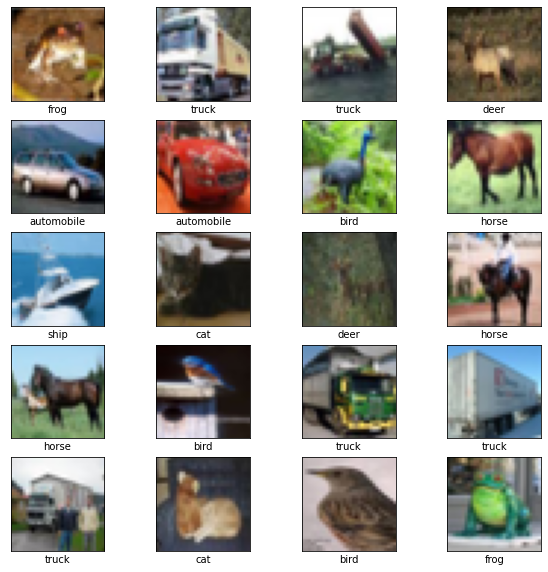

In [6]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtrain[i])
    plt.xlabel(class_label[ytrain[i][0]])
plt.show()


In [7]:
print('Pixel size of imgaes in cifar10 dataset',(xtrain.min(),xtrain.max()))
print('Labels in cifar10 dataset',(np.unique(ytrain)))

Pixel size of imgaes in cifar10 dataset (0, 255)
Labels in cifar10 dataset [0 1 2 3 4 5 6 7 8 9]


### Normalisation of the images 
- converting the pixels from 0-255 to 0-1 range.

- we divide an image's pixel value with the max pixel value(255) 

In [8]:
xtrain= xtrain / 255.0
xtest = xtest / 255.0

### One hot encoding the input 
We do one hot encoding as the label classes are on nominal scale


In [9]:
labels = len(class_label)
ytrain=tf.keras.utils.to_categorical(ytrain,labels)
ytest= tf.keras.utils.to_categorical(ytest,labels)

### Model Building

In [10]:
model = tf.keras.models.Sequential()
# Sequential model along with Dense layer is selected to create a fully connected neural network 

In [11]:
model.add(tf.keras.layers.Conv2D(filters= 64,kernel_size=3,activation='relu',padding='same', input_shape=([32,32,3])))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(filters= 128,kernel_size=3,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(filters= 64,kernel_size=3,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(filters= 32,kernel_size=3,activation='relu',padding='same'))


In [12]:
model.add(tf.keras.layers.Dropout(0.3)) # to tackle overfitting of the model

In [13]:
# Data in neural networks requires to be fed in flattened format 
model.add(tf.keras.layers.Flatten())

### Viewing the Convolution architecture of the model 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          1

### Stacking of Artificial Neural Network

In [15]:
model.add(tf.keras.layers.Dense(128,activation= 'relu'))
model.add(tf.keras.layers.Dense(10,activation= 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          1

### Compiling the model

In [17]:
model.compile(optimizer ='Adam', loss='categorical_crossentropy',metrics=['accuracy']) 

### Model Fitting

In [20]:
model_history =model.fit(xtrain,ytrain,batch_size=12, epochs=15,validation_data =(xtest,ytest))

Epoch 1/15
4167/4167 [==============================] - 177s 43ms/step - loss: 1.2402 - accuracy: 0.5523 - val_loss: 1.1320 - val_accuracy: 0.6011
Epoch 2/15
4167/4167 [==============================] - 146s 35ms/step - loss: 1.0338 - accuracy: 0.6319 - val_loss: 0.9672 - val_accuracy: 0.6608
Epoch 3/15
4167/4167 [==============================] - 147s 35ms/step - loss: 0.9251 - accuracy: 0.6743 - val_loss: 0.9483 - val_accuracy: 0.6607
Epoch 4/15
4167/4167 [==============================] - 144s 34ms/step - loss: 0.8616 - accuracy: 0.6954 - val_loss: 0.8533 - val_accuracy: 0.7004
Epoch 5/15
4167/4167 [==============================] - 134s 32ms/step - loss: 0.8098 - accuracy: 0.7143 - val_loss: 0.8591 - val_accuracy: 0.7010
Epoch 6/15
4167/4167 [==============================] - 141s 34ms/step - loss: 0.7662 - accuracy: 0.7300 - val_loss: 0.8325 - val_accuracy: 0.7095
Epoch 7/15
4167/4167 [==============================] - 150s 36ms/step - loss: 0.7390 - accuracy: 0.7397 - val_loss: 0

### Model Evaluation

In [ ]:
ypred = model.predict(xtest)
print('Actual',ytest[0])
print('Predicted',ypred[0])

Actual [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted [6.1125907e-06 4.3894212e-05 2.4416635e-04 6.4515360e-02 5.2123381e-05
 9.3491352e-01 8.5319887e-05 2.3086966e-05 6.0476946e-06 1.1033793e-04]


- The actual class of the 1st image lies on the 3rd index and the model's prediction is also the 3rd index for the particular image
 - The model is predicting the label class appropriately.

In [ ]:
score= model.evaluate(xtest,ytest,verbose=0)
score

[0.8794203400611877, 0.7131999731063843]

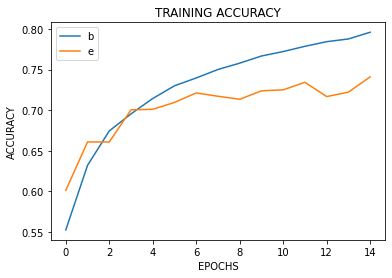

In [21]:
plt.plot(model_history.history["accuracy"],label='Train')
plt.plot(model_history.history["val_accuracy"],label='Test')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.title('TRAINING ACCURACY')
plt.legend('best')
plt.show()


- The model's training accuracy is 79% and validation accuracy is 74%. 
- The training accuracy increases with the increasing epochs. But after certain epochs the increase in accuracy is not much significant.

- Solution:
 Increasing the batchsize, altering the number of neurons or epochs, early stopping can help.

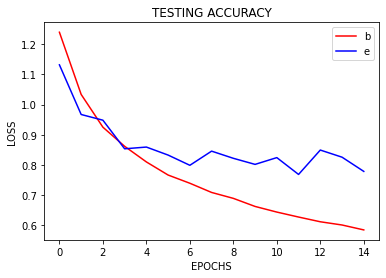

In [22]:
plt.plot(model_history.history["loss"],'r',label='Train')
plt.plot(model_history.history["val_loss"],'b',label='Test')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('TESTING ACCURACY')
plt.legend('best')
plt.show()

Validation loss is increasing whereas the training loss is decreasing, this indicates we need to introduce some bias in the training phase to reduce the validation loss as there exits a problem of overfitting.

#### Solution:
- We can alter the dropout rate 
- Weight Decay
- Early stopping